 # 📑 &nbsp; Deep Learning. P0: Image Classification

<a href="https://olgabelitskaya.github.io/README.html">&#x1F300; &nbsp; Home Page &nbsp; &nbsp; &nbsp;</a> 
<a href="https://www.instagram.com/olga.belitskaya/">&#x1F300; &nbsp; Instagram Posts &nbsp; &nbsp; &nbsp;</a>  <a href="https://www.pinterest.ru/olga_belitskaya/code-style/">&#x1F300; &nbsp; Pinterest Posts &nbsp; &nbsp; &nbsp;</a><br/>
In this project, we'll classify images from the 
<a href="https://www.kaggle.com/olgabelitskaya/flower-color-images">Flower Color Images Dataset.</a><br/>
The content is very simple:<br/> 
210 images (128x128x3) with 10 species of flowering plants 
stored in the file <i>FlowerColorImages.h5.zip</i>.<br/>
In the original dataset, photo files are in the .png format and the labels are integers.

In [121]:
%%html
<table style="width:30%; background-color:lightgray; 
              font-family:'Lobster'; font-size:150%;">
<tr><th>Label </th><th> Flower Name </th></tr>
<tr><td style="color:#FF355E;"><center> 0 </center></td>
<td style="color:#FF355E;"><left> => phlox </left></td></tr>
<tr><td style="color:#FF6037;"><center> 1 </center></td>
<td style="color:#FF6037;"><left> => rose </left></td></tr>
<tr><td style="color:#FF9966;"><center> 2 </center></td>
<td style="color:#FF9966;"><left> => calendula </left></td></tr>
<tr><td style="color:#FFCC33;"><center> 3 </center></td>
<td style="color:#FFCC33;"><left> => iris </left></td></tr> 
<tr><td style="color:#FFFF66;"><center> 4 </center></td>
<td style="color:#FFFF66;"><left> => max chrysanthemum </left></td></tr>
<tr><td style="color:#CCFF00;"><center> 5 </center></td>
<td style="color:#CCFF00;"><left> => bellflower </left></td></tr>
<tr><td style="color:#66FF66;"><center> 6 </center></td>
<td style="color:#66FF66;"><left> => viola </left></td></tr>
<tr><td style="color:#50BFE6;"><center> 7 </center></td>
<td style="color:#50BFE6;"><left> => rudbeckia laciniata </left></td></tr>
<tr><td style="color:#FF6EFF;"><center> 8 </center></td>
<td style="color:#FF6EFF;"><left> => peony </left></td></tr>
<tr><td style="color:#FF00CC;"><center> 9 </center></td>
<td style="color:#FF00CC;"><left> => aquilegia </left></td></tr>
</table>

Label,Flower Name
0,=> phlox
1,=> rose
2,=> calendula
3,=> iris
4,=> max chrysanthemum
5,=> bellflower
6,=> viola
7,=> rudbeckia laciniata
8,=> peony
9,=> aquilegia


We'll preprocess the images, then train a neural network on all the samples.<br/> 
The images need to be normalized and the labels need to be one-hot encoded.<br/>
We are going to apply 
<a href="https://keras.io/">Keras: The Python Deep Learning library.</a><br/>
At the end, we'll get to see the neural network's predictions on the sample images.<br/>
## ✒️ &nbsp;Step 0. Import Libraries 

In [0]:
%tensorflow_version 1.x

In [0]:
import pandas as pd,numpy as np,pylab as pl
import keras as ks,tensorflow as tf
import zipfile,h5py,urllib,random
import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [0]:
from keras.preprocessing import image as ksimage
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential,load_model
from keras.layers import BatchNormalization,Conv2D,Dense
from keras.layers import LSTM,Flatten,Activation,Dropout
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.layers import MaxPooling2D,GlobalMaxPooling2D

In [125]:
from keras import __version__
print('keras version:', __version__)
print('tensorflow version:', tf.__version__)

keras version: 2.2.5
tensorflow version: 1.15.0


## ✒️ &nbsp;Step 1. Load and Explore the Data 

In [0]:
path='https://olgabelitskaya.github.io/'
zf='FlowerColorImages.h5.zip'
input_file=urllib.request.urlopen(path+zf)
output_file=open(zf,'wb'); 
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r'); keys=list(f.keys())
images=np.array(f[keys[0]])
labels=np.array(f[keys[1]])
names=['phlox','rose','calendula','iris',
       'max chrysanthemum','bellflower','viola',
       'rudbeckia laciniata','peony','aquilegia']

Images => array shape: (210, 128, 128, 3)
Labels => array shape: (210,)


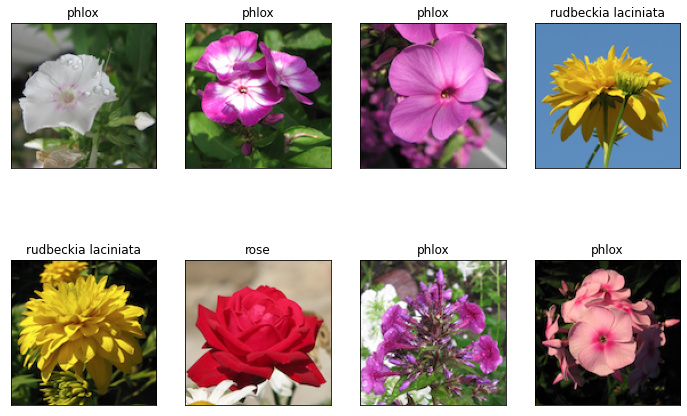

In [128]:
st1='Images => array shape: %s'
st2='Labels => array shape: %s'
print(st1%str(images.shape))
print(st2%str(labels.shape))
fig=pl.figure(figsize=(12,8))
n=random.randint(1,30)
for i in range(n,n+8):
    ax=fig.add_subplot(2,4,i-n+1,\
    xticks=[],yticks=[],title=names[labels[i]])
    ax.imshow((images[i]/255))
pl.show()

## ✒️ &nbsp;Step 2. Save and Load the Data

In [129]:
images_csv=images.reshape(210,128*128*3)
np.savetxt("flower_images.csv",images_csv,
           fmt='%i',delimiter=",")
np.savetxt("flower_labels.csv",labels,
           fmt='%i',delimiter=",")
images=pd.read_csv("flower_images.csv",header=None)
labels=pd.read_csv("flower_labels.csv",header=None)
display(images.iloc[:int(10),:int(10)])
display(labels.iloc[:int(20)].T)

,0,1,2,3,4,5,6,7,8,9
0,13,22,10,14,23,9,16,24,10,16
1,38,49,30,37,50,30,38,52,30,40
2,65,83,48,72,87,58,74,90,62,81
3,162,53,102,147,66,91,156,80,97,169
4,193,52,78,194,51,76,195,58,85,197
5,53,76,55,53,76,55,53,77,56,53
6,8,9,8,8,9,9,9,9,9,8
7,9,9,8,9,9,9,8,8,8,8
8,195,127,169,188,118,160,135,76,101,55
9,7,7,7,8,7,7,8,9,8,9


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,0,2,0,0,1,6,0,0,0,0,0,0,7,7,1,0,0,6,0


## ✒️ &nbsp;Step 3. Implement Preprocess Functions

In [0]:
images=images.values; labels=labels.values
images=images.reshape(-1,128,128,3)/255
labels=to_categorical(labels,10)

In [131]:
x_train,x_test,y_train,y_test=\
train_test_split(images,labels,test_size=.1,random_state=1)
m=int(len(x_test)/2)
x_valid,y_valid=x_test[:m],y_test[:m]
x_test,y_test=x_test[m:],y_test[m:]
del images,labels
display([x_train.shape,x_test.shape,x_valid.shape,
         y_train.shape,y_test.shape,y_valid.shape])

[(189, 128, 128, 3),
 (11, 128, 128, 3),
 (10, 128, 128, 3),
 (189, 10),
 (11, 10),
 (10, 10)]

Label: max chrysanthemum


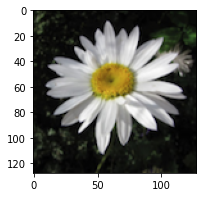

In [132]:
st='Label: '+names[np.argmax(y_train[n])]
print(st); pl.figure(figsize=(4,3))
pl.imshow((x_train[n])); pl.show()

## ✒️ &nbsp;Step 4. Define the Model

In [0]:
def model():
    model=Sequential()
    model.add(Conv2D(32,(5,5),padding='same', 
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(Conv2D(96,(5,5)))
    model.add(Activation('relu'))   
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(GlobalMaxPooling2D())
    
    model.add(Dense(1024,activation='tanh'))
    model.add(Dropout(.25))    
    model.add(Dense(64,activation='tanh'))
    model.add(Dropout(.25)) 
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',metrics=['accuracy'])   
    return model
model=model()

## ✒️ &nbsp;Step 5. Train the Model

In [134]:
fw='weights.best.flowers.hdf5'
early_stopping=EarlyStopping(monitor='val_loss',patience=20,verbose=2)
checkpointer=ModelCheckpoint(filepath=fw,save_best_only=True,verbose=2)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',verbose=2,
                               patience=5,factor=.8)
history=model.fit(x_train,y_train,epochs=100,batch_size=16,
                  verbose=2,validation_data=(x_valid,y_valid),
                  callbacks=[checkpointer,early_stopping,lr_reduction])

Train on 189 samples, validate on 10 samples
Epoch 1/100
 - 5s - loss: 2.4360 - acc: 0.1429 - val_loss: 2.2780 - val_acc: 0.3000

Epoch 00001: val_loss improved from inf to 2.27802, saving model to weights.best.flowers.hdf5
Epoch 2/100
 - 0s - loss: 2.1652 - acc: 0.1693 - val_loss: 2.2087 - val_acc: 0.4000

Epoch 00002: val_loss improved from 2.27802 to 2.20866, saving model to weights.best.flowers.hdf5
Epoch 3/100
 - 0s - loss: 1.9162 - acc: 0.2698 - val_loss: 1.8772 - val_acc: 0.5000

Epoch 00003: val_loss improved from 2.20866 to 1.87718, saving model to weights.best.flowers.hdf5
Epoch 4/100
 - 0s - loss: 1.5712 - acc: 0.4180 - val_loss: 1.6486 - val_acc: 0.3000

Epoch 00004: val_loss improved from 1.87718 to 1.64857, saving model to weights.best.flowers.hdf5
Epoch 5/100
 - 0s - loss: 1.3288 - acc: 0.5344 - val_loss: 1.5162 - val_acc: 0.3000

Epoch 00005: val_loss improved from 1.64857 to 1.51619, saving model to weights.best.flowers.hdf5
Epoch 6/100
 - 0s - loss: 1.1545 - acc: 0.57

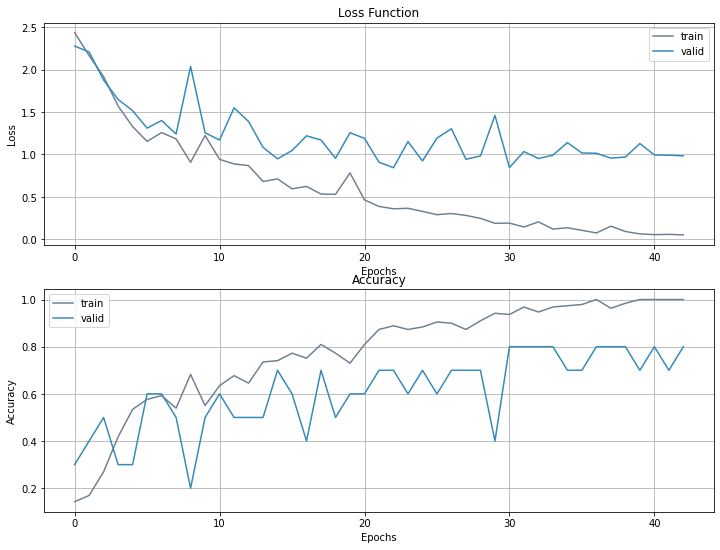

In [135]:
def history_plot(fit_history):
    pl.figure(figsize=(12,9));pl.subplot(211)
    pl.plot(fit_history.history['loss'],
            color='slategray',label='train')
    pl.plot(fit_history.history['val_loss'],
            color='#348ABD',label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Loss")
    pl.legend(); pl.grid()
    pl.title('Loss Function')      
    pl.subplot(212)
    pl.plot(fit_history.history['acc'],
            color='slategray',label='train')
    pl.plot(fit_history.history['val_acc'], 
            color='#348ABD',label='valid')
    pl.xlabel('Epochs'); pl.ylabel('Accuracy')    
    pl.legend(); pl.title('Accuracy')
    pl.grid(); pl.show()
history_plot(history)

## ✒️ &nbsp;Step 6. Evaluate and Save the Model

In [136]:
model.load_weights(fw)
model.save('model.h5')
model=load_model('model.h5')
model.evaluate(x_test,y_test)

11/11 [==============================] - 2s 163ms/step


[0.8386759161949158, 0.8181818127632141]

## ✒️ &nbsp;Step 7. Display Predictions



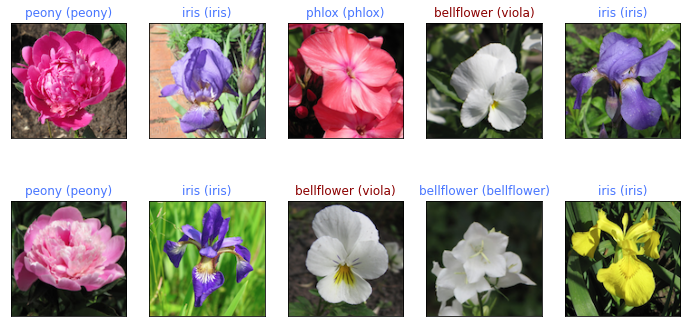

In [137]:
y_test_predict=model.predict_classes(x_test)
fig=pl.figure(figsize=(12,6))
randch=np.random.choice(x_test.shape[0],size=10,replace=False)
for i,idx in enumerate(randch):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx=y_test_predict[idx]
    true_idx=np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(names[pred_idx],names[true_idx]),
                 color=("#4876ff" if pred_idx==true_idx else "darkred"))
pl.show()

## ✒️ &nbsp; Step 8. Keras Applications

In [0]:
from keras.applications.vgg16 \
import VGG16,preprocess_input as prei16
from keras.preprocessing import image as ksimage
from keras.models import Model
from keras.layers import Dense,GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
vgg16bmodel=VGG16(weights='imagenet',include_top=False)
pvx_train=vgg16bmodel.predict(x_train)
pvx_valid=vgg16bmodel.predict(x_valid)
pvx_test=vgg16bmodel.predict(x_test)
sh=pvx_train.shape[1:]

In [0]:
def vgg16model():
    model=Sequential()  
    model.add(GlobalAveragePooling2D(input_shape=sh))   
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.5))        
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.25))   
    model.add(Dense(10,activation='softmax'))    
    model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',metrics=['accuracy'])
    return model
vgg16model=vgg16model()

In [141]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.8)
estopping=EarlyStopping(monitor='val_loss',patience=30,verbose=2)
history=vgg16model.fit(pvx_train,y_train, 
                       validation_data=(pvx_valid,y_valid), 
                       epochs=800,batch_size=64,verbose=2, 
                       callbacks=[checkpointer,lr_reduction,estopping])

Train on 189 samples, validate on 10 samples
Epoch 1/800
 - 5s - loss: 2.3845 - acc: 0.1323 - val_loss: 2.2019 - val_acc: 0.3000

Epoch 00001: val_loss improved from inf to 2.20187, saving model to weights.best.flowers.hdf5
Epoch 2/800
 - 0s - loss: 2.2480 - acc: 0.1746 - val_loss: 2.0628 - val_acc: 0.4000

Epoch 00002: val_loss improved from 2.20187 to 2.06280, saving model to weights.best.flowers.hdf5
Epoch 3/800
 - 0s - loss: 2.1197 - acc: 0.2540 - val_loss: 1.9159 - val_acc: 0.5000

Epoch 00003: val_loss improved from 2.06280 to 1.91592, saving model to weights.best.flowers.hdf5
Epoch 4/800
 - 0s - loss: 2.0172 - acc: 0.3175 - val_loss: 1.7002 - val_acc: 0.5000

Epoch 00004: val_loss improved from 1.91592 to 1.70020, saving model to weights.best.flowers.hdf5
Epoch 5/800
 - 0s - loss: 1.8490 - acc: 0.3439 - val_loss: 1.5932 - val_acc: 0.4000

Epoch 00005: val_loss improved from 1.70020 to 1.59323, saving model to weights.best.flowers.hdf5
Epoch 6/800
 - 0s - loss: 1.6842 - acc: 0.44

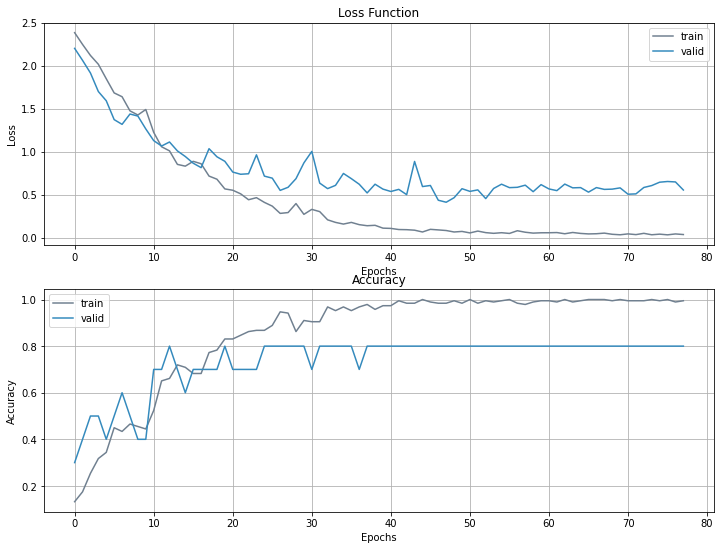

11/11 [==============================] - 0s 314us/step


[0.408292293548584, 0.9090909361839294]

In [142]:
history_plot(history)
vgg16model.load_weights(fw)
vgg16model.evaluate(pvx_test,y_test)

In [0]:
from keras.applications.inception_v3 \
import InceptionV3,preprocess_input as iv3pi
iv3bmodel=InceptionV3(weights='imagenet',include_top=False)
x=iv3bmodel.output
x=GlobalAveragePooling2D()(x)
x=Dense(512)(x)
x=LeakyReLU(alpha=.02)(x)
y=Dense(10,activation='softmax')(x)
iv3model=Model(inputs=iv3bmodel.input,outputs=y)
for layer in iv3bmodel.layers:
    layer.trainable=False    
iv3model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [144]:
steps,epochs=189,10
generator=ksimage.ImageDataGenerator(shear_range=.2,zoom_range=.2,
                                     horizontal_flip=True)
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.8)
history=iv3model.fit_generator(generator.flow(x_train,y_train,batch_size=64), 
                               steps_per_epoch=steps,epochs=epochs, 
                               callbacks=[checkpointer,lr_reduction],
                               validation_data=(x_valid,y_valid))

Epoch 1/10
189/189 [==============================] - 52s 278ms/step - loss: 0.4905 - acc: 0.8655 - val_loss: 2.5293 - val_acc: 0.7000

Epoch 00001: val_loss improved from inf to 2.52935, saving model to weights.best.flowers.hdf5
Epoch 2/10
189/189 [==============================] - 43s 230ms/step - loss: 0.1399 - acc: 0.9607 - val_loss: 4.7001 - val_acc: 0.5000

Epoch 00002: val_loss did not improve from 2.52935
Epoch 3/10
189/189 [==============================] - 44s 230ms/step - loss: 0.0977 - acc: 0.9706 - val_loss: 4.6452 - val_acc: 0.6000

Epoch 00003: val_loss did not improve from 2.52935
Epoch 4/10
189/189 [==============================] - 44s 230ms/step - loss: 0.0863 - acc: 0.9746 - val_loss: 5.4661 - val_acc: 0.4000

Epoch 00004: val_loss did not improve from 2.52935
Epoch 5/10
189/189 [==============================] - 43s 229ms/step - loss: 0.0691 - acc: 0.9781 - val_loss: 5.4498 - val_acc: 0.5000

Epoch 00005: val_loss did not improve from 2.52935
Epoch 6/10
189/189 [==

In [145]:
for i,layer in enumerate(iv3bmodel.layers[173:]):
    print(i,layer.name)

0 batch_normalization_240
1 batch_normalization_245
2 activation_258
3 activation_263
4 conv2d_253
5 conv2d_258
6 batch_normalization_241
7 batch_normalization_246
8 activation_259
9 activation_264
10 average_pooling2d_24
11 conv2d_251
12 conv2d_254
13 conv2d_259
14 conv2d_260
15 batch_normalization_239
16 batch_normalization_242
17 batch_normalization_247
18 batch_normalization_248
19 activation_257
20 activation_260
21 activation_265
22 activation_266
23 mixed6
24 conv2d_265
25 batch_normalization_253
26 activation_271
27 conv2d_266
28 batch_normalization_254
29 activation_272
30 conv2d_262
31 conv2d_267
32 batch_normalization_250
33 batch_normalization_255
34 activation_268
35 activation_273
36 conv2d_263
37 conv2d_268
38 batch_normalization_251
39 batch_normalization_256
40 activation_269
41 activation_274
42 average_pooling2d_25
43 conv2d_261
44 conv2d_264
45 conv2d_269
46 conv2d_270
47 batch_normalization_249
48 batch_normalization_252
49 batch_normalization_257
50 batch_normaliz

In [146]:
for layer in iv3model.layers[:173]:
    layer.trainable=False
for layer in iv3model.layers[173:]:
    layer.trainable=True
iv3model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
history=iv3model.\
fit_generator(generator.flow(x_train,y_train,batch_size=64), 
                             steps_per_epoch=steps,epochs=epochs, 
                             callbacks=[checkpointer,lr_reduction],
                             validation_data=(x_valid,y_valid))

Epoch 1/10
189/189 [==============================] - 64s 340ms/step - loss: 0.1474 - acc: 0.9814 - val_loss: 6.9750 - val_acc: 0.5000

Epoch 00001: val_loss did not improve from 2.52935
Epoch 2/10
189/189 [==============================] - 50s 265ms/step - loss: 0.0908 - acc: 0.9933 - val_loss: 3.2080 - val_acc: 0.6000

Epoch 00002: val_loss did not improve from 2.52935
Epoch 3/10
189/189 [==============================] - 50s 266ms/step - loss: 0.0777 - acc: 0.9931 - val_loss: 16.1181 - val_acc: 0.0000e+00

Epoch 00003: val_loss did not improve from 2.52935
Epoch 4/10
189/189 [==============================] - 50s 266ms/step - loss: 0.2269 - acc: 0.9848 - val_loss: 1.0702 - val_acc: 0.8000

Epoch 00004: val_loss improved from 2.52935 to 1.07018, saving model to weights.best.flowers.hdf5
Epoch 5/10
189/189 [==============================] - 50s 265ms/step - loss: 0.0825 - acc: 0.9937 - val_loss: 0.7769 - val_acc: 0.7000

Epoch 00005: val_loss improved from 1.07018 to 0.77692, saving m

In [147]:
iv3model.load_weights(fw)
scores=iv3model.evaluate(x_test,y_test)
print("Accuracy: %.2f%%"%(scores[1]*100))

11/11 [==============================] - 0s 3ms/step
Accuracy: 90.91%


In [148]:
y_test_predict=iv3model.predict(x_test)
y_test_predict=[np.argmax(y_test_predict[i]) for i in range(11)]
y_test_predict

[5, 0, 3, 4, 8, 3, 8, 3, 2, 3, 6]

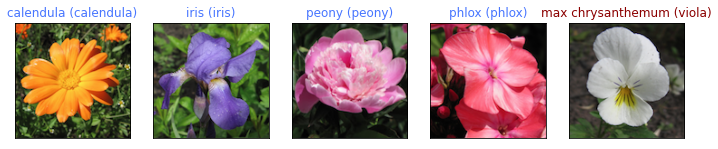

In [149]:
fig=pl.figure(figsize=(12,4))
randch=np.random.choice(x_test.shape[0],size=5,replace=False)
for i,idx in enumerate(randch):
    ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx=y_test_predict[idx]
    true_idx=np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(names[pred_idx],names[true_idx]),
                 color=("#4876ff" if pred_idx==true_idx else "darkred"))
pl.show()